# Data representation in matplotlib P.1 graphs 

## What are we going to do?

* [Get a large dataset from html table](#Make-a-dataframe-from-html) 
* [Clean the data for use](#Cleaning-the-dataframe)
* [Plot relevant table for visualization](#Preparing-Tables-to-plot)
* [Styling the graphs](#Styling-graphs)
    * [Adding details](#Adding-details)
    * [Adding a grid](#Adding-a-grid)
    * [Keeping interval of 1 year and rotating markers](#Keeping-interval-of-1-year-and-rotating-markers)
    * [Resizing the plot](#Resizing-the-plot)
    * [Choosing other prebuilt graph styles](#Choosing-other-prebuilt-graph-styles)
    * [Changing line styles and size](#Changing-line-styles-and-size)
* [Final result](#Final-Result)


## Importing libraries
For this operation we need pandas for parsing and making data tables from html and matplotlib library to plot the information. We also need numpy to manupulate the plots for styling.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


## Make a dataframe from html

In [3]:
df = pd.read_html("https://www.desinventar.net/DesInventar/profiletab.jsp?countrycode=npl")[16]

We use pandas read_html function to pass a url to scrape the html table from. You can visit the [website](https://www.desinventar.net/DesInventar/profiletab.jsp?countrycode=npl) to view tables. The data we need is in the 16th table so we add [16] at last.

Let's print first 5 rows to see what we got!

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Year,DataCards,Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Indirectly Affected,Directly affected,Relocated,Evacuated,Losses $USD,Losses $Local,Education centers,Hospitals,Damages in crops Ha.,Lost Cattle,Damages in roads Mts
1,1971,114,311,57,NaN,131,142,860,NaN,NaN,NaN,NaN,861750,2,NaN,500,1335,NaN
2,1972,115,173,88,37,771,86,902,NaN,NaN,250,NaN,4709610,1,NaN,397,340,NaN
3,1973,207,214,317,9,1957,160,7846,NaN,114,NaN,NaN,3709000,NaN,NaN,1404,709,500
4,1974,231,507,725,43,2615,859,19917,NaN,NaN,174,NaN,11580753,1,NaN,17347,1431,1045



## Cleaning the dataframe
Well you can see in 1st row the unnecessary numbers as heading we want to remove those and replace with the actual headings in 0 row.

In [5]:
df.columns = df.iloc[0]
df.head()

,Year,DataCards,Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Indirectly Affected,Directly affected,Relocated,Evacuated,Losses $USD,Losses $Local,Education centers,Hospitals,Damages in crops Ha.,Lost Cattle,Damages in roads Mts
0,Year,DataCards,Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Indirectly Affected,Directly affected,Relocated,Evacuated,Losses $USD,Losses $Local,Education centers,Hospitals,Damages in crops Ha.,Lost Cattle,Damages in roads Mts
1,1971,114,311,57,NaN,131,142,860,NaN,NaN,NaN,NaN,861750,2,NaN,500,1335,NaN
2,1972,115,173,88,37,771,86,902,NaN,NaN,250,NaN,4709610,1,NaN,397,340,NaN
3,1973,207,214,317,9,1957,160,7846,NaN,114,NaN,NaN,3709000,NaN,NaN,1404,709,500
4,1974,231,507,725,43,2615,859,19917,NaN,NaN,174,NaN,11580753,1,NaN,17347,1431,1045


Well df.iloc[0]  seem to delete original heading and replace 0th row as heading by coping it. Let's remove that 0th row now.
Also let us replace all NaN with zero to ease computation and representation.

In [6]:
df = df.reindex(df.index.drop(0))
df = df.fillna('0')
df.head()

,Year,DataCards,Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Indirectly Affected,Directly affected,Relocated,Evacuated,Losses $USD,Losses $Local,Education centers,Hospitals,Damages in crops Ha.,Lost Cattle,Damages in roads Mts
1,1971,114,311,57,0,131,142,860,0,0,0,0,861750,2,0,500,1335,0
2,1972,115,173,88,37,771,86,902,0,0,250,0,4709610,1,0,397,340,0
3,1973,207,214,317,9,1957,160,7846,0,114,0,0,3709000,0,0,1404,709,500
4,1974,231,507,725,43,2615,859,19917,0,0,174,0,11580753,1,0,17347,1431,1045
5,1975,145,263,133,38,2051,36,37612,0,0,72,0,6146670,4,0,1292,723,0


Well that's much better!


## Preparing Tables to plot
Lets choose to plot the houses damaged and destroyed with respect to years. First we select the respective columns and get its values 

In [7]:
house_destroyed = df['Houses Destroyed'].values
house_damaged = df['Houses Damaged'].values
year = df['Year'].values

We now take a look at the values and its datatype for first few sample items.

In [8]:
for value in house_destroyed[:5]:
    print(value, type(value))

131 <class 'str'>
771 <class 'str'>
1957 <class 'str'>
2615 <class 'str'>
2051 <class 'str'>


As we can see they are of python strings datatype but to plot and do calculations they should be in integers because they are numerical data. Lets change their datatype and store them in list through list comprehension!

In [9]:
year_x = [int(i) for i in list(year)]
house_damaged_y = [int(i) for i in list(house_damaged)]
house_destroyed_y = [int(i) for i in list(house_destroyed)]

Ok. We can now pass these to matplotlib to plot a graph finally!

We use plot function in pyplot module of matplotlib which takes x axis and y axis as compulsory parameters. We will plot year in horizontal(x-axis) and house destroyed/damaged in vertical(y-axis).

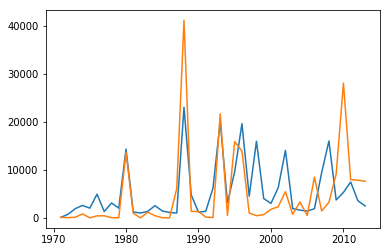

In [15]:
plt.plot(year_x, house_destroyed_y)
plt.plot(year_x, house_damaged_y)


## Styling graphs

### Adding details
Let us first add a nice title and label and for the graph.

Text(0.5,1,'Destroyed and damaged houses')

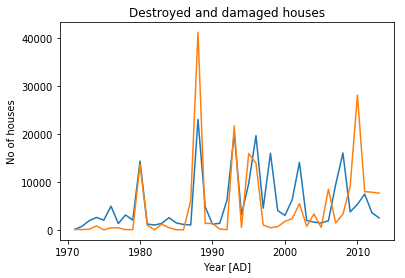

In [17]:
plt.plot(year_x, house_destroyed_y)
plt.plot(year_x, house_damaged_y)

plt.ylabel('No of houses')
plt.xlabel('Year [AD]')
plt.title('Destroyed and damaged houses')

That's better. Let us now add a legend!

To add a legend we need to call legend() function. With legend string as params.

In [20]:
plt.legend(['Destroyed houses', 'Damaged houses'])

Notice, the items in the list should be in same order they were plotted in first place. This way can be little daunting when you change the order of plotting. So instead there is second option. We can pass in the label parameter while plotting and just call the legend function without any parameters.

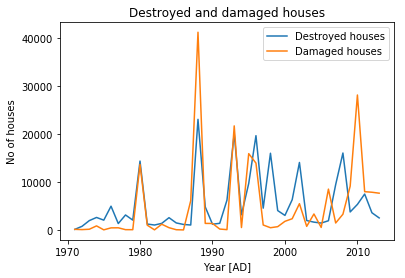

In [21]:
plt.plot(year_x, house_destroyed_y, label='Destroyed houses')
plt.plot(year_x, house_damaged_y, label='Damaged houses')

plt.ylabel('No of houses')
plt.xlabel('Year [AD]')
plt.title('Destroyed and damaged houses')
plt.legend()


### Adding a grid 
Well that's much better. However we can change a lot of things here. First let us add a grid to visualize the boundaries in x and y axis.

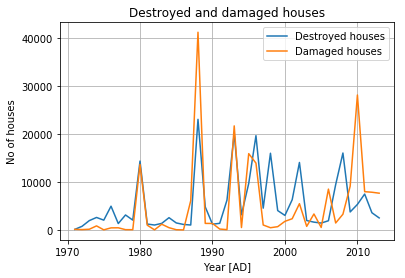

In [23]:
plt.plot(year_x, house_destroyed_y, label='Destroyed houses')
plt.plot(year_x, house_damaged_y, label='Damaged houses')

plt.ylabel('No of houses')
plt.xlabel('Year [AD]')
plt.title('Destroyed and damaged houses')
plt.legend()

plt.grid(True)


### Keeping interval of 1 year and rotating markers
Finally How about fitting all the years in 1 year interval in x-axis? Also let us rotate those years vertically. To modify those we use plt.xticks function.

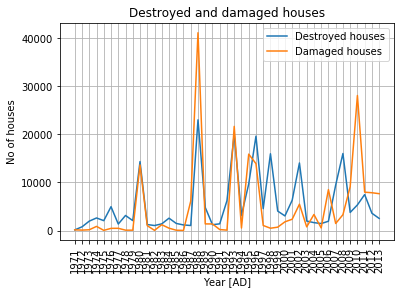

In [25]:
plt.plot(year_x, house_destroyed_y, label='Destroyed houses')
plt.plot(year_x, house_damaged_y, label='Damaged houses')

plt.ylabel('No of houses')
plt.xlabel('Year [AD]')
plt.title('Destroyed and damaged houses')
plt.legend()

plt.xticks(np.arange(min(year_x), max(year_x)+1, 1.0))
plt.xticks(rotation=90)

plt.grid(True)


### Resizing the plot
OOPS!! Well it seems our default graph is too short in width lets increase its size. We get a current size dictionary from rcParams function and then modify it and again pass it to rcParams function to override the default with our size.

In [26]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12  # width is 0th item.
plt.rcParams["figure.figsize"] = fig_size


### Choosing other prebuilt graph styles 
We will plot the graph in a while. Let us now choose a diffrent style for our graph. To get all available styles use

In [28]:
plt.style.available

Some of my favorites are ggplot, fivethirtyeight and seaborn ones. Lets use fivethirtyeight this time! 

TIP: Use plt.xkcd() for getting graph that looks like drawn by hand.

In [29]:
plt_style = 'fivethirtyeight'
plt.style.use(plt_style)

Lets finally plot the graph yet again.

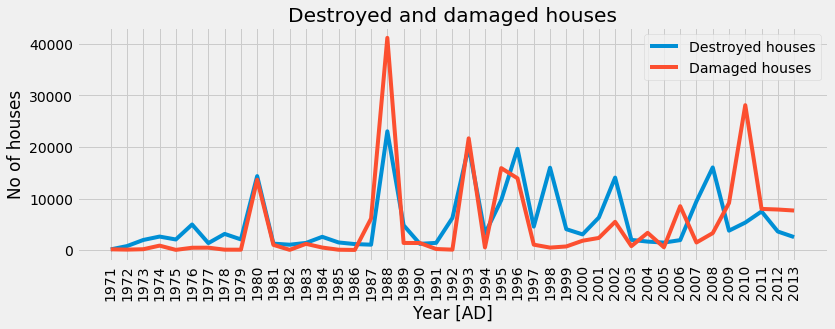

In [31]:
plt.plot(year_x, house_destroyed_y, label='Destroyed houses')
plt.plot(year_x, house_damaged_y, label='Damaged houses')

plt.ylabel('No of houses')
plt.xlabel('Year [AD]')
plt.title('Destroyed and damaged houses')
plt.legend()

plt.xticks(np.arange(min(year_x), max(year_x)+1, 1.0))
plt.xticks(rotation=90)

plt.grid(True)

Yep that's dope!


### Changing line styles and size
We can change style and size of lines in graph as well by passing relevant parameters to plot function. Lets change the line style of damaged house to dash like (-----) and width to only 2.

In [12]:
plt.plot(year_x, house_destroyed_y, label='Destroyed houses')
plt.plot(year_x, house_damaged_y, linestyle='--', linewidth=2, label='Damaged houses')

## Final Result

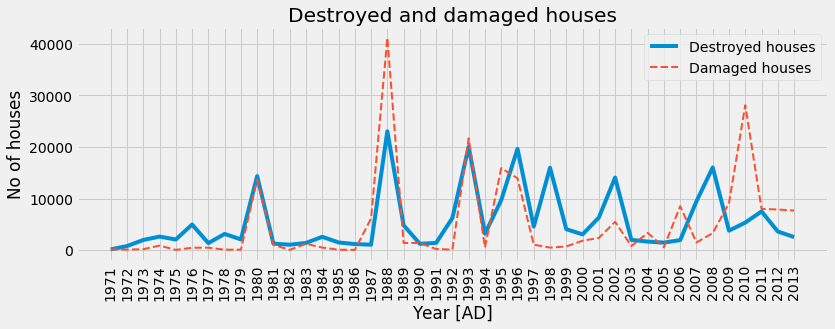

In [32]:
plt.plot(year_x, house_destroyed_y, label='Destroyed houses')
plt.plot(year_x, house_damaged_y, linestyle='--', linewidth=2, label='Damaged houses')

plt.ylabel('No of houses')
plt.xlabel('Year [AD]')
plt.title('Destroyed and damaged houses')
plt.legend()
plt.grid(True)

# managing intervals in x axis
plt.xticks(np.arange(min(year_x), max(year_x)+1, 1.0))
plt.xticks(rotation=90)

# increasing dimensions of plot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12  # width is 0th item.
plt.rcParams["figure.figsize"] = fig_size

# Using other graph styles
plt_style = 'fivethirtyeight'
plt.style.use(plt_style)